In [79]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

player_pergame = pd.read_csv("Player Per Game.csv")
player_awards = pd.read_csv("Player Award Shares.csv")
player_allstar = pd.read_csv("All-Star Selections.csv")
player_end_teams = pd.read_csv("End of Season Teams.csv")
team_stats = pd.read_csv("Team Summaries.csv")
advanced_stats = pd.read_csv("Advanced.csv")

In [80]:
player_pergame

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,0.500,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.3,1.9
31866,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,0.511,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.6
31867,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,0.534,NaN,NaN,NaN,0.7,NaN,NaN,NaN,2.3,5.1
31868,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,0.477,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.2,2.9


In [81]:
player_awards.iloc[42, 9] = False
player_awards.iloc[42:51,]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
42,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,False,31672,4352
43,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,31769,4670
44,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False,31593,4654
45,2024,nba mvp,Giannis Antetokounmpo,29,MIL,1.0,192.0,990.0,0.194,False,31366,4164
46,2024,nba mvp,Jalen Brunson,27,NYK,0.0,142.0,990.0,0.143,False,31429,4630
47,2024,nba mvp,Jayson Tatum,25,BOS,0.0,86.0,990.0,0.087,False,31468,4518
48,2024,nba mvp,Anthony Edwards,22,MIN,0.0,18.0,990.0,0.018,False,31171,4808
49,2024,nba mvp,Domantas Sabonis,27,SAC,0.0,3.0,990.0,0.003,False,31320,4400
50,2024,nba mvp,Kevin Durant,35,PHO,0.0,1.0,990.0,0.001,False,31551,3770


In [82]:
player_pergame["mvp"] = False
star_season = []
for i in range(len(player_awards)):
    if player_awards.at[i, "award"] == 'nba mvp':
        if player_awards.at[i, "winner"] == True:
            star = player_awards.at[i,'player']
            season = player_awards.at[i,'season']
            star_season.append([star,season])

for i in range(len(player_pergame)):
    player = player_pergame.at[i,'player']
    season = player_pergame.at[i,'season']
    player_season = [player,season]
    if player_season in star_season:
        player_pergame.at[i,'mvp'] = True


In [83]:
player_pergame

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,mvp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,False
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,False
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,False
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,False
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.3,1.9,False
31866,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.6,False
31867,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,NaN,NaN,NaN,0.7,NaN,NaN,NaN,2.3,5.1,False
31868,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.2,2.9,False


In [84]:
team_stats['win_perc'] = team_stats.apply(lambda x: x['w'] / (x['w'] + x['l']), axis=1)
team_stats = team_stats[['season','abbreviation','win_perc','w','l']]
player_db = pd.merge(player_pergame, team_stats,  how='left', left_on=['season','tm'], right_on = ['season','abbreviation'])

In [85]:
data_modern = player_db[player_db['season'] >= 1976]

In [86]:
data_modern.loc[:]['season'] = pd.Categorical(data_modern['season'])
data_modern = data_modern[data_modern['win_perc'].notna()]
data_modern = data_modern[data_modern['abbreviation'].notna()]

In [87]:
east = ['MIL', 'TOT','ATL', 'IND','ORL',
       'BOS', 'DET', 'CHI', 'BRK','WAS', 'MIA','CHO','NYK',
       'CLE', 'TOR','PHI', 'CHA', 'NJN', 'CHH','WSB', 'KCK', ]
west = ['MIN', 'DAL', 'DEN','OKC','SAC', 'SAS', 'HOU', 'LAC', 'GSW',
       'POR', 'LAL','PHO', 'MEM', 'NOP','UTA','NOH','SEA','NOK', 'VAN','SDC']

data_modern['conf'] = 'east'
for index, row in data_modern.iterrows():
    team = row['tm']
    if team in west:
        data_modern.at[index, 'conf'] = 'west'

In [88]:
data_modern

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,blk_per_game,tov_per_game,pf_per_game,pts_per_game,mvp,abbreviation,win_perc,w,l,conf
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.1,0.2,0.9,4.5,False,MIL,0.597561,49.0,33.0,east
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.1,0.3,0.5,3.2,False,DAL,0.609756,50.0,32.0,west
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,0.1,0.4,0.3,2.4,False,ATL,0.439024,36.0,46.0,east
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.6,1.4,1.9,13.9,False,DEN,0.695122,57.0,25.0,west
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.1,0.7,1.6,6.6,False,HOU,0.500000,41.0,41.0,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,6911,1976,1484,William Franklin,NaN,PF,26.0,3,ABA,SAA,...,0.3,0.5,1.6,3.3,False,SAA,0.595238,50.0,34.0,east
25382,6912,1976,1414,Willie Norwood,NaN,SF,28.0,5,NBA,SEA,...,0.1,NaN,2.2,6.9,False,SEA,0.524390,43.0,39.0,west
25383,6913,1976,1236,Willie Wise,1947.0,SF,28.0,7,ABA,VIR,...,0.3,2.7,2.9,13.7,False,VIR,0.180723,15.0,68.0,east
25384,6914,1976,1691,World B. Free,NaN,SG,22.0,1,NBA,PHI,...,0.1,NaN,1.5,8.3,False,PHI,0.560976,46.0,36.0,east


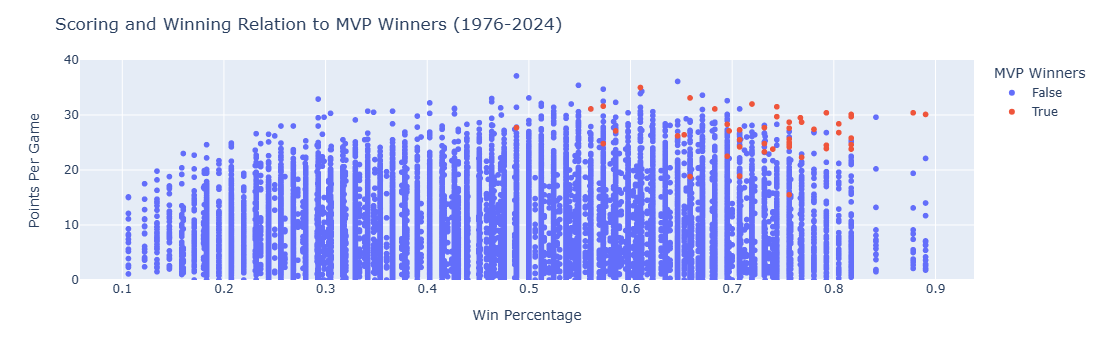

In [89]:
import plotly.express as px

fig = px.scatter(data_modern, x = "win_perc", y = 'pts_per_game', color = "mvp", category_orders={"mvp": [False, True]}, labels = {"mvp": "MVP Winners"})
fig.update_layout(xaxis_title = "Win Percentage", yaxis_title = "Points Per Game", title= 'Scoring and Winning Relation to MVP Winners (1976-2024)', yaxis_range = [0,40])

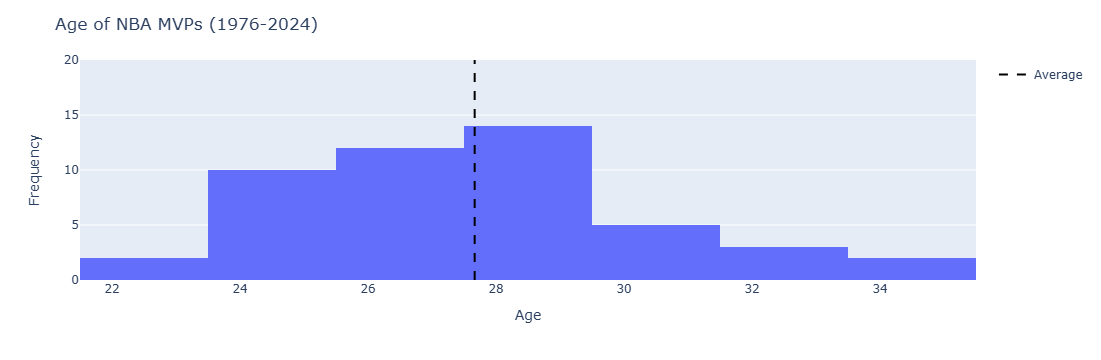

In [90]:
import plotly.graph_objects as go

mvps = data_modern[data_modern['mvp'] == True]
fig = px.histogram(mvps, x = 'age')
fig.add_trace(go.Scatter(x = [mvps["age"].mean(),mvps["age"].mean()], y = [0,140], mode = "lines", line = dict(color = "black", width = 2, dash = 'dash'), name = "Average"))
fig.update_layout(xaxis_title = "Age", yaxis_title = "Frequency", title= 'Age of NBA MVPs (1976-2024)', yaxis_range = [0,20] )

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
from statistics import mean 
import seaborn as sns
import numpy as np
import random 

In [92]:
data_modern['total_games'] = data_modern.apply(lambda x: x['w'] + x['l'], axis=1)
data_modern['games_pct'] = data_modern.apply(lambda x: x['g'] / x['total_games'], axis=1)

data_model_1 = data_modern.copy()
data_model_1 = data_model_1[data_model_1['season'] != 2024]
data_model_1 = data_model_1.fillna(data_model_1.median(numeric_only=True))

In [93]:
def transform(x_cols):
    return make_column_transformer(
                (OneHotEncoder(), ['pos']),
                (OneHotEncoder(), ['conf']),
                (StandardScaler(), x_cols[1:-1]))

def get_train_test(data, test_size):
    train_years = list(range(1980,2024))
    test_years = []
    for i in range(test_size):
        year = random.choice(train_years)
        train_years.remove(year)
        test_years.append(year)
    
    train = data.loc[data['season'].isin(train_years)]
    test = data.loc[data['season'].isin(test_years)]

    return train, test

In [94]:
x_cols = ["pos", "experience", "games_pct", "e_fg_percent", "ft_percent", "orb_per_game","drb_per_game", "trb_per_game",
         "ast_per_game", "stl_per_game", "blk_per_game", "tov_per_game", "pf_per_game","pts_per_game", "win_perc",
         "ft_per_game", "mp_per_game", "conf"]

y_col = "mvp"

trans = transform(x_cols)

model = Pipeline([
            ("tr", trans),
            ("lr", LogisticRegression(fit_intercept = False, max_iter = 1000)),
        ])

train, test = get_train_test(data_model_1, 9)

In [95]:
model.fit(train[x_cols], train[y_col])
model.score(test[x_cols], test[y_col])

0.9978545887961859

In [96]:
def rank_predict(test, model):
    test["prob_mvp"] = model.predict_proba(test[x_cols])[:, 1]
    test['rank'] = test.groupby(['season'])['prob_mvp'].rank(ascending=False)
    test['pred_mvp'] = np.where((test['rank'] == 1), True, False)

In [97]:
rank_predict(test, model)
test

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,abbreviation,win_perc,w,l,conf,total_games,games_pct,prob_mvp,rank,pred_mvp
735,30458,2023,5025,A.J. Green,1952.0,SG,23.0,1,NBA,MIL,...,MIL,0.707317,58.0,24.0,east,82.0,0.426829,0.001906,79.0,False
737,30460,2023,5026,A.J. Lawson,1952.0,SG,22.0,1,NBA,MIN,...,MIN,0.512195,42.0,40.0,west,82.0,0.012195,0.000233,385.0,False
738,30461,2023,5026,A.J. Lawson,1952.0,SG,22.0,1,NBA,DAL,...,DAL,0.463415,38.0,44.0,west,82.0,0.170732,0.000149,454.0,False
739,30467,2023,5027,AJ Griffin,1952.0,SF,19.0,1,NBA,ATL,...,ATL,0.500000,41.0,41.0,east,82.0,0.878049,0.000357,306.0,False
740,30462,2023,4219,Aaron Gordon,1952.0,PF,27.0,9,NBA,DEN,...,DEN,0.646341,53.0,29.0,west,82.0,0.829268,0.009400,29.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,8706,1981,1974,Wes Matthews,1952.0,PG,21.0,1,NBA,WSB,...,WSB,0.475610,39.0,43.0,east,82.0,0.548780,0.000102,229.0,False
23519,8707,1981,1974,Wes Matthews,1952.0,PG,21.0,1,NBA,ATL,...,ATL,0.378049,31.0,51.0,east,82.0,0.414634,0.000024,303.0,False
23520,8708,1981,1155,Wes Unseld,1952.0,C,34.0,13,NBA,WSB,...,WSB,0.475610,39.0,43.0,east,82.0,0.768293,0.000269,164.0,False
23521,8709,1981,1844,Winford Boynes,1952.0,SG,23.0,3,NBA,DAL,...,DAL,0.182927,15.0,67.0,west,82.0,0.536585,0.000017,314.0,False


In [98]:
def score_model(test):
    predictions = list(test['pred_mvp'])
    actual = list(test['mvp'])   
    
    correct = 0
    for i in range(len(test)):
        if predictions[i] == actual[i]:
            correct += 1
    return correct / len(test)

In [99]:
score_model(test)

0.9980929678188319

In [100]:
print("Total players with MVP Wins in data: " + str(test['mvp'].sum()))
print("Total players predicted with MVP Wins: " + str(test['pred_mvp'].sum()))

Total players with MVP Wins in data: 9
Total players predicted with MVP Wins: 9


In [101]:
x = ["pos:center", "pos:pf", "pos:pg", "pos:sf", "pos:sg", "experience", "g", "e_fg_percent", "ft_percent", "orb_per_game","drb_per_game", "trb_per_game",
         "ast_per_game", "stl_per_game", "blk_per_game", "tov_per_game", "pf_per_game","pts_per_game", "win_perc", "ft_per_game", "conf:west", "conf:east"]

coef = list(model['lr'].coef_[0])

for i in range(len(coef) - 1):
    print(x[i] + ": " + str(coef[i]))

pos:center: -2.232906455685941
pos:pf: -2.112063637146704
pos:pg: -2.8239655202718454
pos:sf: -2.48204909662078
pos:sg: -2.056320977480582
experience: -5.916841466752389
g: -5.790464220453462
e_fg_percent: 0.03328895822740574
ft_percent: 0.3068566603493264
orb_per_game: -0.026057887236602774
drb_per_game: 0.1742762952189738
trb_per_game: 0.37812992582310356
ast_per_game: 0.19973648870075267
stl_per_game: 0.17576789872895854
blk_per_game: 0.7203769879455292
tov_per_game: 0.18429574956841244
pf_per_game: 0.25672865989016674
pts_per_game: -0.00645328073477816
win_perc: -0.9875013981493286
ft_per_game: 1.1301590593461968
conf:west: 1.1454715044215278
conf:east: 0.13435302538349098


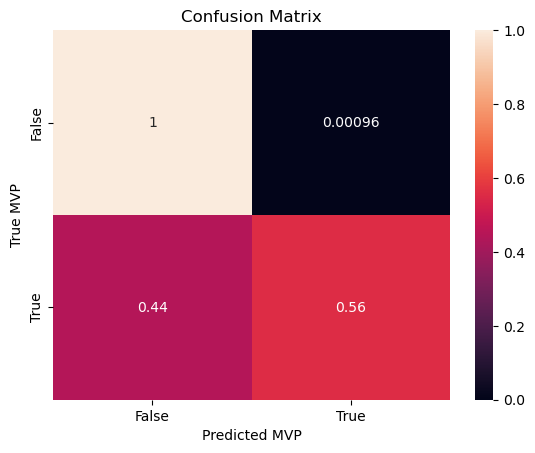

In [102]:
cm = confusion_matrix(test['mvp'], test['pred_mvp'])
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, xticklabels=model['lr'].classes_, yticklabels= model['lr'].classes_, vmin=0, vmax=1, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True MVP')
plt.xlabel('Predicted MVP')
plt.show()

In [103]:
log_loss(test['mvp'], test["prob_mvp"])

0.005640764073896915

In [104]:
data_modern.reset_index(drop=True, inplace=True)

star_seasons_df = player_allstar[['player', 'season']].copy()
star_seasons_df['all_star'] = True

data_modern = pd.merge(data_modern, star_seasons_df, how='left', on=['player','season'])
data_modern['all_star'] = data_modern['all_star'].fillna(False)

In [105]:
data_modern['all_star_appearances'] = 0
for index, row in data_modern.iterrows():
    player = row['player']
    year = row['season']
    all_star_appearances = data_modern[(data_modern.player == player) & (data_modern.season < year)]['all_star'].sum()
    data_modern.at[index, 'all_star_appearances'] = all_star_appearances

In [106]:
data_modern.reset_index(drop=True, inplace=True)

all_nba_df = player_end_teams[player_end_teams['type'] == 'All_NBA'][['player', 'season']].copy()
all_nba_df['all_nba'] = True

data_modern = pd.merge(data_modern, all_nba_df, how='left', on=['player','season'])
data_modern['all_nba'] = data_modern['all_nba'].fillna(False)

In [107]:
data_modern['all_nba_teams'] = 0
for index, row in data_modern.iterrows():
    player = row['player']
    year = row['season']
    all_nba_teams = data_modern[(data_modern.player == player) & (data_modern.season < year)]['all_nba'].sum()
    data_modern.at[index, 'all_nba_teams'] = all_nba_teams

In [108]:
data_modern

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,win_perc,w,l,conf,total_games,games_pct,all_star,all_star_appearances,all_nba,all_nba_teams
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.597561,49.0,33.0,east,82.0,0.682927,False,0,False,0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.609756,50.0,32.0,west,82.0,0.512195,False,0,False,0
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,0.439024,36.0,46.0,east,82.0,0.243902,False,0,False,0
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.695122,57.0,25.0,west,82.0,0.890244,False,0,False,0
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.500000,41.0,41.0,west,82.0,0.951220,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23073,6911,1976,1484,William Franklin,NaN,PF,26.0,3,ABA,SAA,...,0.595238,50.0,34.0,east,84.0,0.119048,False,0,False,0
23074,6912,1976,1414,Willie Norwood,NaN,SF,28.0,5,NBA,SEA,...,0.524390,43.0,39.0,west,82.0,0.780488,False,0,False,0
23075,6913,1976,1236,Willie Wise,1947.0,SF,28.0,7,ABA,VIR,...,0.180723,15.0,68.0,east,83.0,0.554217,False,0,False,0
23076,6914,1976,1691,World B. Free,NaN,SG,22.0,1,NBA,PHI,...,0.560976,46.0,36.0,east,82.0,0.865854,False,0,False,0


In [109]:
new_stats = advanced_stats[['ts_percent','per','usg_percent','ws','vorp','player','season']]
new_stats

,ts_percent,per,usg_percent,ws,vorp,player,season
0,0.617,10.5,15.2,1.1,0.0,A.J. Green,2024
1,0.519,11.2,20.0,0.2,-0.2,A.J. Lawson,2024
2,0.382,1.2,17.3,-0.4,-0.3,AJ Griffin,2024
3,0.607,16.8,17.8,7.1,1.9,Aaron Gordon,2024
4,0.578,11.5,16.7,2.5,0.2,Aaron Holiday,2024
...,...,...,...,...,...,...,...
31865,0.398,NaN,NaN,0.3,NaN,Walt Miller,1947
31866,0.269,NaN,NaN,-0.1,NaN,Warren Fenley,1947
31867,0.280,NaN,NaN,0.8,NaN,Wilbert Kautz,1947
31868,0.405,NaN,NaN,0.6,NaN,Woody Grimshaw,1947


In [110]:
print(data_modern.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'mvp', 'abbreviation', 'win_perc', 'w', 'l', 'conf',
       'total_games', 'games_pct', 'all_star', 'all_star_appearances',
       'all_nba', 'all_nba_teams'],
      dtype='object')


In [111]:
data_modern = pd.merge(data_modern, new_stats,  how='left', left_on=['player','season'], right_on = ['player','season'])

data_model_2 = data_modern.copy()
data_model_2 = data_model_2[data_model_2['season'] != 2024]
data_model_2 = data_model_2.fillna(data_model_2.median(numeric_only=True))

In [112]:
print(data_model_2.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'mvp', 'abbreviation', 'win_perc', 'w', 'l', 'conf',
       'total_games', 'games_pct', 'all_star', 'all_star_appearances',
       'all_nba', 'all_nba_teams', 'ts_percent', 'per', 'usg_percent', 'ws',
       'vorp'],
      dtype='object')


In [113]:
x_cols = ["pos", "experience", "games_pct", "e_fg_percent", "ft_percent", "orb_per_game","drb_per_game", "trb_per_game",
         "ast_per_game", "stl_per_game", "blk_per_game", "tov_per_game", "pf_per_game","pts_per_game", "win_perc",
         "ft_per_game", "ts_percent", "per", "usg_percent", "ws", "vorp", "all_star_appearances", "all_nba_teams", "conf"]

y_col = "mvp"

trans = transform(x_cols)

model_2 = Pipeline([
            ("tr", trans),
            ("lr", LogisticRegression(fit_intercept = False, max_iter = 1000)),
        ])

log_loss_2 = []
scores_2 = []

for i in range(50):
    train, test = get_train_test(data_model_2, 9)
    model_2.fit(train[x_cols], train[y_col])
    rank_predict(test, model_2)
    scores_2.append(score_model(test))
    log_loss_2.append(log_loss(test['mvp'], test["prob_mvp"]))

In [114]:
x_cols = ["pos", "experience", "games_pct", "e_fg_percent", "ft_percent", "orb_per_game", "drb_per_game", "trb_per_game",
         "ast_per_game", "stl_per_game", "blk_per_game", "tov_per_game", "pf_per_game","pts_per_game", "win_perc",
         "ft_per_game", "conf"]

trans = transform(x_cols)

model_1 = Pipeline([
            ("tr", trans),
            ("lr", LogisticRegression(fit_intercept = False, max_iter = 1000)),
        ])

log_loss_1 = []
scores_1 = []

for i in range(50):
    train, test = get_train_test(data_model_1, 9)
    model_1.fit(train[x_cols], train[y_col])
    rank_predict(test, model_1)
    scores_1.append(score_model(test))
    log_loss_1.append(log_loss(test['mvp'], test["prob_mvp"]))

In [115]:
print("Average score for original inputs: " + str(mean(scores_1)))
print("Average score for new inputs: " + str(mean(scores_2)))
print("Average log loss for original inputs: " + str(mean(log_loss_1)))
print("Average log loss for new inputs: " + str(mean(log_loss_2)))

Average score for original inputs: 0.9982434383907947
Average score for new inputs: 0.9989437672629213
Average log loss for original inputs: 0.005767658534576118
Average log loss for new inputs: 0.0036850670055240337


In [116]:
x = ["pos:center", "pos:pf", "pos:pg", "pos:sf", "pos:sg", "experience", "g", "e_fg_percent", "ft_percent", "orb_per_game","drb_per_game", "trb_per_game",
     "ast_per_game", "stl_per_game", "blk_per_game", "tov_per_game", "pf_per_game","pts_per_game", "win_perc", "ft_per_game", "ts_percent", "per", 
     "usg_percent", "ws", "vorp", "all_star_appearances", "all_nba_teams", "conf:west", "conf:east"]

coef = list(model_2['lr'].coef_[0])

for i in range(len(coef) - 1):
    print(x[i] + ": " + str(coef[i]))

pos:center: -2.1550600657154675
pos:pf: -2.1790772255595052
pos:pg: -2.4152247823199517
pos:sf: -2.7406138019701354
pos:sg: -2.462790003076553
experience: -5.820662463631987
g: -6.132103415009629
e_fg_percent: -0.01366181386544289
ft_percent: -0.38160776424657283
orb_per_game: -0.05110811559578506
drb_per_game: 0.1317784354562987
trb_per_game: 0.012383489919068827
ast_per_game: 0.09884633470242564
stl_per_game: 0.03335311526746995
blk_per_game: -0.1770050756263516
tov_per_game: -0.24028385308837652
pf_per_game: -0.027453737337271047
pts_per_game: 0.44206244109101983
win_perc: -0.35305162477103175
ft_per_game: -0.04972165214426988
ts_percent: 0.908062506877418
per: -0.03221102162685172
usg_percent: -0.23737502971909838
ws: 0.19713652436958462
vorp: 0.09202149688390118
all_star_appearances: 0.16441950592769278
all_nba_teams: 0.8089359341087414
conf:west: -0.008195164940222153


In [120]:
from sklearn.model_selection import GridSearchCV

model_3_test = Pipeline([
            ("tr", trans),
            ("lr", LogisticRegression(fit_intercept = False, max_iter = 1000)),
        ])

param = [
    {"lr__C": np.logspace(-5, 5, 20)},
]

clf = GridSearchCV(model_3_test, param_grid = param, cv = 3, verbose=True, n_jobs=-1)
clf.fit(data_model_2[x_cols], data_model_2[y_col]).best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


Pipeline(steps=[('tr',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(), ['pos']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(), ['conf']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['experience', 'games_pct',
                                                   'e_fg_percent', 'ft_percent',
                                                   'orb_per_game',
                                                   'drb_per_game',
                                                   'trb_per_game',
                                                   'ast_per_game',
                                                   'stl_per_game',
                                                   'blk_per_game',
                                                   'tov_per_game',
                                                   'pf_per_game',
                                                   'pts_per_game', 'win_perc',
                                                   'ft_per_game'])])),
                ('lr',
                 LogisticRegression(C=6.1584821106602545, fit_intercept=False,
                                    max_iter=1000))])

In [121]:
best_model = clf.best_estimator_
best_C = best_model.named_steps['lr'].C

model_3_test = Pipeline([
            ("tr", trans),
            ("lr", LogisticRegression(fit_intercept = False, max_iter = 1000, C = best_C)),
        ])

scores_3 = []
log_loss_3 = []

for i in range(100):
    train, test = get_train_test(data_model_2, 9)
    model_3_test.fit(train[x_cols], train[y_col])
    rank_predict(test, model_3_test)
    scores_3.append(score_model(test))
    log_loss_3.append(log_loss(test['mvp'], test["prob_mvp"]))

In [122]:
print("MODEL 2")
print("AVG Score: " + str(mean(scores_2)))
print("AVG Log Loss: " + str(mean(log_loss_2)))
print("-----------------------------------")
print("MODEL 3")
print("AVG Score: " + str(mean(scores_3)))
print("AVG Log Loss: " + str(mean(log_loss_3)))

MODEL 2
AVG Score: 0.9989437672629213
AVG Log Loss: 0.0036850670055240337
-----------------------------------
MODEL 3
AVG Score: 0.9989899495352061
AVG Log Loss: 0.0029882013910801338


In [124]:
final_model = Pipeline([
            ("tr", trans),
            ("lr", LogisticRegression(fit_intercept = False, max_iter = 1000, C = best_C, class_weight = "balanced")),
        ])

data_model_final = data_modern.copy()
data_model_final = data_model_final.fillna(data_model_final.median(numeric_only=True))
train = data_model_final[data_model_final['season'] != 2024]
test = data_model_final[data_model_final['season'] == 2024]

final_model.fit(train[x_cols], train[y_col])
rank_predict(test, final_model)

test['rank'] = test['rank'].astype(int)
print("2024 MVP PREDICTIONS:")
print((test[(test["pred_mvp"] == True)].sort_values('rank')[['player','rank']]).to_string(index=False))

2024 MVP PREDICTIONS:
      player  rank
Nikola Jokić     1
